### Preliminaries

In [2]:
# Show all figures inline.  
%matplotlib inline

# Add olfaction-prediction to the Python path.  
import os
import sys
curr_path = os.getcwd()
gerkin_path = os.path.split(curr_path)[0]
olfaction_prediction_path = os.path.split(gerkin_path)[0]
sys.path.append(olfaction_prediction_path)
import opc_python

# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import generic utility modules I wrote to load the data from the tab-delimited text files and to score predictions.  
from opc_python.utils import loading, scoring

# Import the modules I wrote for actually shaping and fitting the data to the model.  
from opc_python.gerkin import dream,fit1,fit2,params

###Load the data

In [4]:
Y_all_mask,imputer = dream.make_Y_obs(['training','leaderboard'],
                                      target_dilution=None,imputer='mask')

The Y['mean_std'] matrix now has shape (814x42) molecules by 2 x perceptual descriptors
The Y['subject'] dict now has 49 matrices of shape (814x21) molecules by perceptual descriptors, one for each subject


In [5]:
y = np.ma.dstack([Y_all_mask['subject'][i] for i in range(1,50)])

In [6]:
y2 = np.ma.dstack((y,y))
y2.shape

(814, 21, 98)

In [38]:
from sklearn.cross_validation import ShuffleSplit
n_splits = 100
rm = np.zeros((n_splits,21))
rs = np.zeros((n_splits,21))
shuff = ShuffleSplit(98,n_iter=n_splits,test_size=0.5,random_state=0)
for col in range(21):
    for i,(a,b) in enumerate(shuff):
        ma = np.ma.mean(y2[:,col,a],axis=1)
        mb = np.ma.mean(y2[:,col,b],axis=1)
        sa = np.ma.std(y2[:,col,a],axis=1)
        sb = np.ma.std(y2[:,col,b],axis=1)
        rm[i,col] = np.corrcoef(ma,mb)[0,1]
        rs[i,col] = np.corrcoef(sa,sb)[0,1]

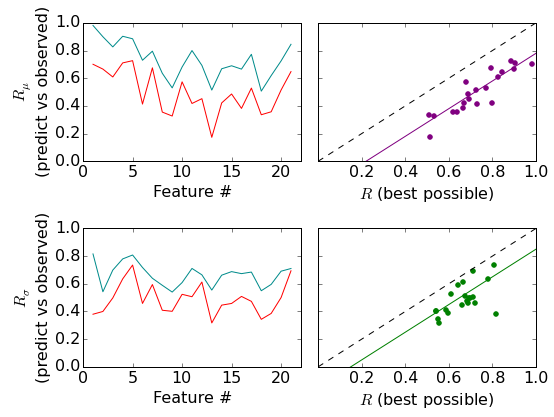

In [86]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(2,2,sharey=True,figsize=(8,6))
ax[0,0].plot(range(1,22),rm.mean(axis=0),color='darkcyan')
ax[0,0].plot(range(1,22),m_best,color='r')
ax[1,0].plot(range(1,22),rs.mean(axis=0),color='darkcyan')
ax[1,0].plot(range(1,22),s_best,color='r')
ax[0,0].set_ylabel(r'$R_\mu$'+'\n(predict vs observed)')
ax[1,0].set_ylabel(r'$R_\sigma$'+'\n(predict vs observed)')
ax[0,0].set_xlabel('Feature #')
ax[1,0].set_xlabel('Feature #')
ax[0,0].set_xlim(0,22)
ax[1,0].set_xlim(0,22)

ax[0,1].scatter(rm.mean(axis=0),m_best,color='purple')
ax[0,1].plot([0,1],[0,1],'--',color='k')
ax[0,1].plot([0,1],[-0.22,0.78],color='purple')
ax[0,1].set_xlabel(r'$R$ (best possible)')
ax[1,1].set_xlabel(r'$R$ (best possible)')
ax[1,1].scatter(rs.mean(axis=0),s_best,color='g')
ax[1,1].plot([0,1],[0,1],'--',color='k')
ax[1,1].plot([0,1],[-0.15,0.85],color='g')
ax[0,1].set_xlim(0,1)
ax[1,1].set_xlim(0,1)
ax[0,1].set_xticks(np.arange(0.2,1.1,0.2))
ax[1,1].set_xticks(np.arange(0.2,1.1,0.2))

for ax_ in ax.flat:
    ax_.set_ylim(0,1)
plt.tight_layout()

In [71]:
feature_gain = np.array([  4.49477830e-01,   3.35441491e-02,   8.00988917e-04,
         2.09450210e-02,   6.24271846e-02,   4.12099097e-03,
         1.66730611e-02,   3.65670578e-02,   1.39832154e-02,
         1.16556116e-02,   3.36497500e-02,   1.54578896e-01,
         4.78454182e-03,   1.97952781e-02,   1.98837753e-03,
         4.58889921e-02,  -1.72261559e-04,   4.81125051e-03,
         3.64629214e-02,   2.82563410e-02,   2.28717850e-01,
         5.38600249e-02,   3.05921144e-02,   1.11136538e-03,
         1.76499212e-02,   3.77150514e-02,   7.30003128e-03,
         3.60392553e-02,   5.38177860e-02,   2.77381436e-02,
         9.05113154e-03,   2.21126167e-02,   1.20358675e-01,
         3.44887474e-02,   1.14175472e-02,   2.14992500e-02,
         6.47988022e-02,   2.48739826e-02,   1.27117643e-02,
         4.64895940e-03,   8.13805832e-03,   1.81775899e-01])

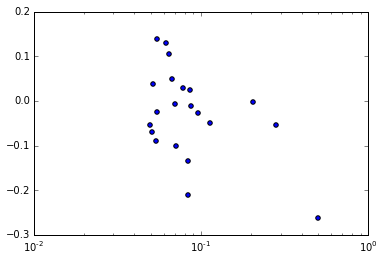

In [81]:
plt.scatter(feature_gain[:21]+0.05,best-rm.mean(axis=0))
plt.xscale('log')
#(best-rm.mean(axis=0)).shape,feature_gain.shape


In [62]:
x = np.zeros(100)
for j in range(100):
    a = np.zeros(1000)
    b = np.zeros(1000)
    for i in range(1000):
        a[i] = norm.rvs(i,1000,40).mean()
        b[i] = norm.rvs(i,1000,40).mean()
    x[j] = np.corrcoef(a,b)[0,1]**2
print(1-x.mean())

0.407305763485


In [18]:
m_best = np.array([0.70097375,  0.66613775,  0.60919667,  0.71083115,  0.72697513,
        0.41324559,  0.67517077,  0.35532091,  0.32683721,  0.5739374 ,
        0.4174755 ,  0.45235007,  0.17290684,  0.42151002,  0.48610618,
        0.3819078 ,  0.52868636,  0.33612901,  0.35745922,  0.51474916,
        0.64789066]) 
s_best = np.array([ 0.38      ,  0.4       ,  0.49785038,  0.63549459,  0.73547243,
        0.45797419,  0.5945972 ,  0.4086892 ,  0.40109547,  0.52394973,
        0.50651325,  0.61262666,  0.31698427,  0.44576133,  0.45793596,
        0.50874842,  0.47298217,  0.34315854,  0.3857553 ,  0.50038353,
        0.69402738])